# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости.

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

**Цель:** разработать модель, которая сможет определять рыночную стоимость своего автомобиля.

**Задачи:**
- загрузить и изучить данные;
- подготовить выборки для обучения моделей;
- обучить разные модели, одна из которых — LightGBM, как минимум одна — не бустинг;
- проанализировать время обучения, время предсказания и качество моделей.
- выбрать лучшую модель, проверить её качество на тестовой выборке.

**План:**
1. <a href="подготовка данных">подготовка данных</a>;
2. <a href="обучение моделей">обучение моделей</a>;
3. <a href="анализ моделей">анализ моделей</a>.

## Подготовка данных
<a href="подготовка данных"></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('/datasets/autos.csv')
df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [ ]:
df.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


In [ ]:
print(df.isnull().sum().sort_values(ascending=False))

Repaired             71154
VehicleType          37490
FuelType             32895
Gearbox              19833
Model                19705
DateCrawled              0
Price                    0
RegistrationYear         0
Power                    0
Kilometer                0
RegistrationMonth        0
Brand                    0
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64


In [ ]:
df.fillna('unknown', inplace=True)

In [ ]:
print(df.isnull().sum().sort_values(ascending=False))

DateCrawled          0
Price                0
VehicleType          0
RegistrationYear     0
Gearbox              0
Power                0
Model                0
Kilometer            0
RegistrationMonth    0
FuelType             0
Brand                0
Repaired             0
DateCreated          0
NumberOfPictures     0
PostalCode           0
LastSeen             0
dtype: int64


Изучим показатели цены.

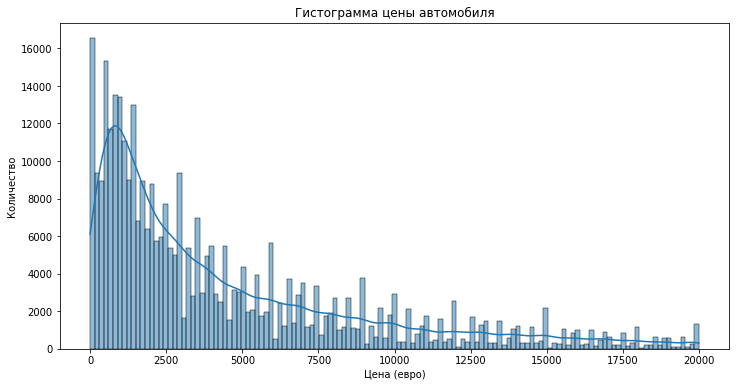

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Price'], kde=True)
plt.title('Гистограмма цены автомобиля')
plt.xlabel('Цена (евро)')
plt.ylabel('Количество')
plt.show()

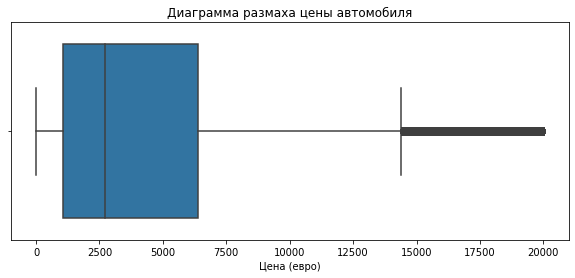

In [ ]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Price'])
plt.title('Диаграмма размаха цены автомобиля')
plt.xlabel('Цена (евро)')
plt.show()

In [ ]:
print(df['Price'].describe())

count    354369.000000
mean       4416.656776
std        4514.158514
min           0.000000
25%        1050.000000
50%        2700.000000
75%        6400.000000
max       20000.000000
Name: Price, dtype: float64


In [ ]:
df = df[df['Price'] > 1000]

In [ ]:
print(sorted(df['RegistrationYear'].unique()))

[1000, 1001, 1039, 1234, 1500, 1600, 1800, 1910, 1923, 1925, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2500, 2800, 2900, 3000, 3200, 3700, 4000, 4100, 4500, 5000, 5555, 5911, 6000, 7000, 7100, 7800, 8500, 8888, 9000, 9999]


Странно, что присутствует год регистрации раньше 1900 и позже 2016.

In [ ]:
df = df[(df['RegistrationYear'] > 1900) & (df['RegistrationYear'] < 2016)]

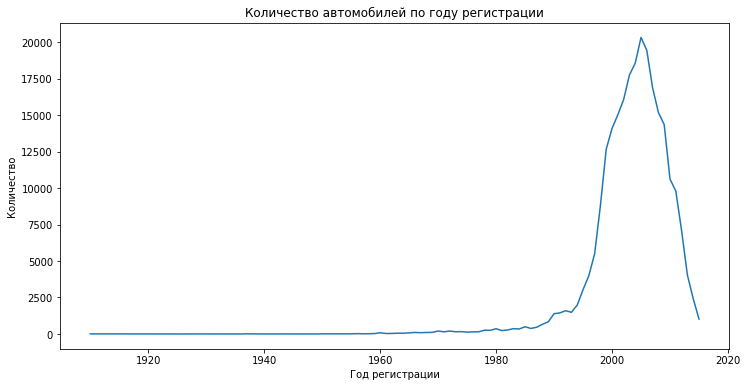

In [ ]:
year_counts = df['RegistrationYear'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(year_counts.index, year_counts.values)
plt.title('Количество автомобилей по году регистрации')
plt.xlabel('Год регистрации')
plt.ylabel('Количество')
plt.xlim()
plt.show()

In [ ]:
df['Power'].describe()

count    251622.000000
mean        123.436492
std         189.070805
min           0.000000
25%          80.000000
50%         116.000000
75%         150.000000
max       20000.000000
Name: Power, dtype: float64

Ограничим показатели с 20 до 600 л.с. Автомобили с  мощностью вне промежутка крайне редки.

In [ ]:
df = df[(df['Power'] >= 20) & (df['Power'] <= 600)]

In [ ]:
df.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,234233.000000,234233.000000,234233.000000,234233.000000,234233.000000,234233.0,234233.000000
mean,5920.716095,2003.692387,129.048964,125327.601149,6.163201,0.0,51803.833627
std,4590.841165,6.215223,54.441073,38082.738204,3.510464,0.0,25725.869165
min,1001.000000,1910.000000,20.000000,5000.000000,0.000000,0.0,1067.000000
25%,2300.000000,2001.000000,90.000000,100000.000000,3.000000,0.0,31303.000000
50%,4399.000000,2004.000000,120.000000,150000.000000,6.000000,0.0,51065.000000
75%,8300.000000,2008.000000,155.000000,150000.000000,9.000000,0.0,72534.000000
max,20000.000000,2015.000000,600.000000,150000.000000,12.000000,0.0,99998.000000


**Вывод по главе**

- Обработали пропуски в столбцах (Repaired, VehicleType, FuelType, Gearbox, Model).
- Изучили показатели цены. Минимальная стоимость составила 0, что является явной аномалией. Поэтому убрали все значения ниже 1000.
- Рассмотрели годы регистрации. Ограничим показатели с 20 до 600 л.с. Автомобили с мощностью вне промежутка крайне редки.

## Обучение моделей
<a href="обучение моделей"></a>

In [ ]:
columns_to_drop = ['DateCrawled', 'DateCreated', 'NumberOfPictures', 'LastSeen', 'RegistrationMonth', 'PostalCode']
df = df.drop(columns=columns_to_drop, axis=1)

In [ ]:
numerical_features = ['RegistrationYear', 'Power', 'Kilometer']
categorical_features = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'Repaired']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [ ]:
print(f"Дубликаты до удаления: {df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"Дубликаты после удаления: {df.duplicated().sum()}")

Дубликаты до удаления: 30396
Дубликаты после удаления: 0


In [ ]:
X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nРазмеры выборок: X_train={X_train.shape}, X_test={X_test.shape}")


Размеры выборок: X_train=(163069, 310), X_test=(40768, 310)


In [ ]:
scaler = StandardScaler()
X_train.loc[:, numerical_features] = scaler.fit_transform(X_train.loc[:, numerical_features])
X_test.loc[:, numerical_features] = scaler.transform(X_test.loc[:, numerical_features])
print("\nЧисловые признаки масштабированы.")


Числовые признаки масштабированы.


/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = {}

# 1. Linear Regression
print("\n--- Обучение Linear Regression ---")
start_time_train_lr = time.time()
model_lr = LinearRegression()
cv_scores_lr = cross_val_score(model_lr, X_train, y_train, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)

model_lr.fit(X_train, y_train)
end_time_train_lr = time.time()
training_time_lr = end_time_train_lr - start_time_train_lr

start_time_predict_lr = time.time()
y_pred_lr_for_eval = model_lr.predict(X_train)
end_time_predict_lr = time.time()
prediction_time_lr = end_time_predict_lr - start_time_predict_lr

mean_cv_rmse_lr = np.sqrt(-cv_scores_lr.mean())

results['Linear Regression'] = {
    'RMSE_CV_mean': mean_cv_rmse_lr,
    'Training_time': training_time_lr,
    'Prediction_time_on_train': prediction_time_lr
}

print(f"  RMSE (CV mean): {mean_cv_rmse_lr:.2f}")
print(f"  Training time: {training_time_lr:.4f} sec")
print(f"  Prediction time (on train data): {prediction_time_lr:.4f} sec")


--- Обучение Linear Regression ---
  RMSE (CV mean): 2718.41
  Training time: 70.1493 sec
  Prediction time (on train data): 0.3099 sec


In [ ]:
# 2. Random Forest Regressor
print("\n--- Обучение и оценка Random Forest Regressor ---")
start_time_train_rf = time.time()
model_rf = RandomForestRegressor(random_state=42, n_estimators=30, max_depth=10, max_features=0.5, n_jobs=-1)

cv_scores_rf = cross_val_score(model_rf, X_train, y_train, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)

model_rf.fit(X_train, y_train)
end_time_train_rf = time.time()
training_time_rf = end_time_train_rf - start_time_train_rf

start_time_predict_rf = time.time()
y_pred_rf_train = model_rf.predict(X_train)
end_time_predict_rf = time.time()
prediction_time_rf = end_time_predict_rf - start_time_predict_rf

rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_pred_rf_train))
r2_train_rf = r2_score(y_train, y_pred_rf_train)

mean_cv_rmse_rf = np.sqrt(-cv_scores_rf.mean())

results['Random Forest Regressor'] = {
    'RMSE_CV_mean': mean_cv_rmse_rf,
    'RMSE_train': rmse_train_rf,
    'R2_train': r2_train_rf,
    'Training_time': training_time_rf,
    'Prediction_time_on_train': prediction_time_rf
}

print(f"  RMSE (CV mean): {mean_cv_rmse_rf:.2f}")
print(f"  RMSE (train): {rmse_train_rf:.2f}")
print(f"  R2 (train): {r2_train_rf:.4f}")
print(f"  Training time: {training_time_rf:.4f} sec")
print(f"  Prediction time (on train data): {prediction_time_rf:.4f} sec")


--- Обучение и оценка Random Forest Regressor ---
  RMSE (CV mean): 1947.28
  RMSE (train): 1884.72
  R2 (train): 0.8346
  Training time: 149.6337 sec
  Prediction time (on train data): 0.7985 sec


In [ ]:
# 3. LGBM Regressor
print("\n--- Обучение и оценка LGBM Regressor ---")
start_time_train_lgbm = time.time()
model_lgbm = LGBMRegressor(random_state=42, n_estimators=100, n_jobs=-1)

cv_scores_lgbm = cross_val_score(model_lgbm, X_train, y_train, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)

model_lgbm.fit(X_train, y_train)
end_time_train_lgbm = time.time()
training_time_lgbm = end_time_train_lgbm - start_time_train_lgbm

start_time_predict_lgbm = time.time()
y_pred_lgbm_train = model_lgbm.predict(X_train)
end_time_predict_lgbm = time.time()
prediction_time_lgbm = end_time_predict_lgbm - start_time_predict_lgbm

rmse_train_lgbm = np.sqrt(mean_squared_error(y_train, y_pred_lgbm_train))
r2_train_lgbm = r2_score(y_train, y_pred_lgbm_train)

mean_cv_rmse_lgbm = np.sqrt(-cv_scores_lgbm.mean())

results['LGBM'] = {
    'RMSE_CV_mean': mean_cv_rmse_lgbm,
    'RMSE_train': rmse_train_lgbm,
    'R2_train': r2_train_lgbm,
    'Training_time': training_time_lgbm,
    'Prediction_time_on_train': prediction_time_lgbm
}

print(f"  RMSE (CV mean): {mean_cv_rmse_lgbm:.2f}")
print(f"  RMSE (train): {rmse_train_lgbm:.2f}")
print(f"  R2 (train): {r2_train_lgbm:.4f}")
print(f"  Training time: {training_time_lgbm:.4f} sec")
print(f"  Prediction time (on train data): {prediction_time_lgbm:.4f} sec")


--- Обучение и оценка LGBM Regressor ---
  RMSE (CV mean): 1748.36
  RMSE (train): 1719.97
  R2 (train): 0.8622
  Training time: 32.9091 sec
  Prediction time (on train data): 2.0899 sec


## Анализ моделей
<a href="анализ моделей"></a>

In [ ]:
print("\n--- Сводная таблица метрик кросс-валидации ---")
results_df_cv = pd.DataFrame(results).T
print(results_df_cv[['RMSE_CV_mean', 'Training_time']])


--- Сводная таблица метрик кросс-валидации ---
                         RMSE_CV_mean  Training_time
Linear Regression         2718.414705      70.149285
Random Forest Regressor   1947.275874     149.633730
LGBM                      1748.356699      32.909095


Исходя из метрик кросс-валидации, модель **LGBM** выглядит наиболее перспективной. У неё самый низкий RMSE и она является самой быстрой в обучении.

**Random Forest Regressor** также показывает хорошее качество, но проигрывает LGBM по обоим параметрам. **Linear Regression**, являясь самой простой моделью, показала наихудшие результаты.

In [ ]:
print("\n--- Финальная оценка лучшей модели (LGBM) на тестовой выборке ---")

start_time_predict_final_lgbm = time.time()
y_pred_final_lgbm = model_lgbm.predict(X_test)
end_time_predict_final_lgbm = time.time()
prediction_time_final_lgbm = end_time_predict_final_lgbm - start_time_predict_final_lgbm

rmse_test_final_lgbm = np.sqrt(mean_squared_error(y_test, y_pred_final_lgbm))
r2_test_final_lgbm = r2_score(y_test, y_pred_final_lgbm)

if 'LGBM' in results:
    results['LGBM']['RMSE_test_final'] = rmse_test_final_lgbm
    results['LGBM']['R2_test_final'] = r2_test_final_lgbm
    results['LGBM']['Prediction_time_on_test_final'] = prediction_time_final_lgbm

print(f"  Final RMSE (test): {rmse_test_final_lgbm:.2f}")
print(f"  Final R2 (test): {r2_test_final_lgbm:.4f}")
print(f"  Final Prediction time (on test data): {prediction_time_final_lgbm:.4f} sec")


--- Финальная оценка лучшей модели (LGBM) на тестовой выборке ---
  Final RMSE (test): 1725.42
  Final R2 (test): 0.8608
  Final Prediction time (on test data): 0.4169 sec


In [ ]:
print("\n--- Итоговая сводка результатов ---")
results_df_final = pd.DataFrame(results).T
print(results_df_final)


--- Итоговая сводка результатов ---
                         RMSE_CV_mean  Training_time  \
Linear Regression         2718.414705      70.149285   
Random Forest Regressor   1947.275874     149.633730   
LGBM                      1748.356699      32.909095   

                         Prediction_time_on_train   RMSE_train  R2_train  \
Linear Regression                        0.309861          NaN       NaN   
Random Forest Regressor                  0.798515  1884.724379  0.834567   
LGBM                                     2.089895  1719.972871  0.862225   

                         RMSE_test_final  R2_test_final  \
Linear Regression                    NaN            NaN   
Random Forest Regressor              NaN            NaN   
LGBM                          1725.42359       0.860762   

                         Prediction_time_on_test_final  
Linear Regression                                  NaN  
Random Forest Regressor                            NaN  
LGBM                     

**Выводы по моделям:**

- LGBM – лучшая модель по качеству предсказания (RMSE) и самая быстрая по времени обучения.
- Random Forest – хорошая модель, но медленнее и немного хуже LGBM.
- Linear Regression – самая простая модель, но имеет худшее качество предсказания.

In [ ]:
if hasattr(model_rf, 'feature_importances_'):
    feature_importances_rf = pd.Series(model_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
    print("\n--- Top 10 Feature Importances (Random Forest) ---")
    print(feature_importances_rf.head(10))


--- Top 10 Feature Importances (Random Forest) ---
RegistrationYear           0.535550
Power                      0.285184
Kilometer                  0.063284
VehicleType_small          0.023379
VehicleType_convertible    0.012364
Model_transporter          0.011069
Gearbox_manual             0.009508
FuelType_gasoline          0.007069
Repaired_yes               0.007052
Brand_audi                 0.006034
dtype: float64


- RegistrationYear и Power – самые важные признаки. Это логично, так как возраст и мощность напрямую влияют на цену автомобиля.
- Kilometer – также важный признак, но менее значимый, чем год и мощность.
- VehicleType_convertible, Model_transporter, Repaired_yes, Brand_audi, Brand_volkswagen, Brand_mercedes_benz, Brand_bmw – закодированные категориальные признаки. Их важность варьируется. Например, тип кузова “convertible” и модель “transporter” имеют заметное влияние. Марки автомобилей тоже влияют, но в меньшей степени, чем год, мощность или тип кузова/модель.

In [ ]:
if hasattr(model_lgbm, 'feature_importances_'):
    feature_importances_lgbm = pd.Series(model_lgbm.feature_importances_, index=X_train.columns).sort_values(ascending=False)
    print("\n--- Top 10 Feature Importances (LGBM) ---")
    print(feature_importances_lgbm.head(10))


--- Top 10 Feature Importances (LGBM) ---
RegistrationYear           552
Power                      494
Kilometer                  209
VehicleType_convertible     84
Model_transporter           80
Repaired_yes                69
Brand_audi                  67
Brand_mercedes_benz         62
Brand_volkswagen            59
Brand_bmw                   58
dtype: int32


- Важность признаков LGBM показывается в виде чисел, которые отражают, сколько раз признак был использован для разделений.
- RegistrationYear, Power, Kilometer – снова лидируют, как и ожидалось.
- Числа важности у LGBM значительно больше, чем доли у Random Forest. Это связано с разной внутренней логикой подсчета важности признаков.



`Лучшая модель:` LGBM Regressor является лучшим выбором на основе полученных метрик.